<a href="https://colab.research.google.com/github/hzhoujoy/ST554_HomeWork5/blob/main/HomeWork5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Work 5
Author: Huiping Zhou   
Date: 2/27/2026

In this home work, we will explore issues around big data including bias in data and models along
with practicing SQL skills.

# Part I- Concepts

## Question 1
We discussed the "Five V's of Big Data". Give an example of a place where you've encountered big data or a topic you are interested in where big data would arise. Specifically address the five V's for the example and whether/how they apply to your example.

The Five V's of big data are **volume, variety, velocity, veracity, and value**. I like to listen to music, podcasts, and audiobooks using Spotify. Spotify relies on massive amounts of data to recommend songs, create personalized “Liked Songs” playlists, and analyze listening behavior.
- Volume
With over 751 million active users, Spotify processes an enormous amount of data every day. This includes song streams, podcast plays, and user interactions (such as likes, skips, and ratings). These large-scale data sets represent the volume characteristic of big data.
- Variety
Spotify handles many different types of data from various sources—music files, songs, lyrics, podcasts, videos, and even user-generated data. These include both structured and unstructured formats, which reflect the variety aspect of big data.
- Velocity
New songs, albums, and podcasts are constantly being created and uploaded to Spotify. User interactions also occur in real time. This rapid generation and processing of data represent velocity.
- Veracity
Veracity refers to the quality and accuracy of the data being analyzed. Spotify must deal with data inconsistencies, missing metadata, mislabeled content, and noise, all of which can affect recommendations and analytics.
- Value
Spotify collects a huge amount of information, but the key is turning that data into value. For example, by improving user recommendations, enhancing search, or helping creators understand their audience. Since analyzing data requires time and cost, extracting meaningful value is essential.

## Question 2
Read about the database we'll use below (part IV). Give an example for each letter in the CRUD acronym in the context of this database.
The acronmy CRUD is this four functions: create data, read data,updata data, delete data.
We checked the database and found the schema of the table **CollegePlaying** are
```
CREATE TABLE CollegePlaying (playerID TEXT, schoolID TEXT, yearID INTEGER)
```
C-Create: We will add a new player who played for NCSU in 2026 into the table CollegePlaying
```
INSERT INTO CollegePlaying (playerID, schoolID, yearID)
VALUES ('12345', 'ncsu', 2026);
```
R-Read: we will retrive the record for playerID='12345'
```
SELECT *
FROM CollegePlaying
WHERE playerID = '12345';
```
U-Update: we will update the school for playerID=12345
```
UPDATE CollegePlaying
SET schoolID = 'rice'
WHERE playerID = '12345'
AND yearID = 2026;
```
D-Delete: we'll remove the row that we inserted
```
DELETE FROM CollegePlaying
WHERE playerID = 12345
AND schoolID = 'rice';
```


## Question 3
What is the purpose of the [HAVING clause](https://www.sqlservertutorial.net/sql-server-basics/sql-server-having/) when writing SQL code?

The the `HAVING` clause is used to filter the groups based on a list of conditions after they have beed grouped using the `GROUP BY` clause. The general `HAVING` clause syntax is:
```
SELECT
    select_list
FROM
    table_name
GROUP BY
    group_list
HAVING
    conditions;
```


# Part II - Simulation of a Sampling Distribution

## Question 4
We will use simulation to invertigate the sampling distribution of $\hat{p}$ in notebook.
We assume the following model for SLR
$$
Y_i = \beta_0 + \beta_1 x_i + E_i
$$

where the $E_i$ are assumed to be independent and identically distributed from a Normal distribution with mean $0$ and variance $\sigma^2$. Let's assume $\sigma^2 = 1$ for simplicity.


We can generate data from this model by assuming values for $\beta_0$, $\beta_1$ and n, along with a sequence of x values via the following code:

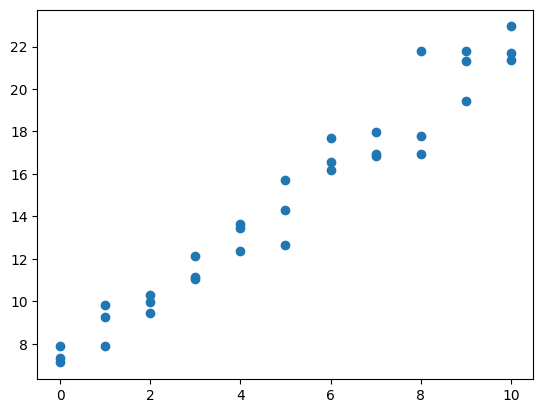

In [2]:
#import some modules needed
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
rng = default_rng(32)
beta_0 = 7
beta_1 = 1.5
# get three 'values' of x at each integer from 0 to 10.
x = np.array(list(np.linspace(start = 0, stop = 10, num = 11))*3)
n = 33
#create the 'responses' modeled from the line plus a random deviation
y = beta_0 + beta_1*x + rng.standard_normal(n)
#visualize the data
plt.scatter(x = x, y = y)
plt.show()

Now we can use sklearn to obtain the estimate for the slope (and save that value) as we did
earlier in the course.

In [10]:
from sklearn import linear_model
import numpy as np

# sklearn expects a 2D array for X
X = x.reshape(-1, 1)

# Fit SLR with intercept
reg = linear_model.LinearRegression() #Create a reg objec
reg.fit(X, y)

# Extract and save the slope (and intercept if you want)
slope_hat = reg.coef_
intercept_hat = reg.intercept_

print(f"Estimated slope (beta_1 hat): {slope_hat[0]:.4f}")
print(f"Estimated intercept (beta_0 hat): {intercept_hat:.4f}")

Estimated slope (beta_1 hat): 1.5005
Estimated intercept (beta_0 hat): 7.0626


Repeat the above process 5000 times. To be specific:

- Generate the y values using the code with rng.standard_normal()
- Find the 'best' slope via sklearn
- Save that slope in some object

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
from sklearn import linear_model

rng = default_rng(32) # seed
beta_0 = 7
beta_1 = 1.5
# get three 'values' of x at each integer from 0 to 10.
x = np.array(list(np.linspace(start = 0, stop = 10, num = 11))*3)
n = len(x) # Ensure n matches the length of x

simulations = 5000
slopes = []

# sklearn expects a 2D array for X
X = x.reshape(-1, 1)

for _ in range(simulations):
    # Generate the y values with random normal noise
    y = beta_0 + beta_1 * x + rng.standard_normal(n)

    # Fit OLS with intercept
    reg = linear_model.LinearRegression() #Create a reg objec
    reg.fit(X, y)

    # Extract and save the slope
    slopes.append(reg.coef_[0])

# Convert the list of slopes to a NumPy array for easier analysis
slopes = np.array(slopes)

# BEST slope estimate across all 5000 runs
best_slope = slopes.mean()


print(f"Finished {simulations} simulations. Collected {len(slopes)} estimated slopes.")
print(f"First 5 estimated slopes: {slopes[:5]}")
print(f"Best slope (mean over 5000 simulations): {best_slope:.4f}")

Finished 5000 simulations. Collected 5000 estimated slopes.
First 5 estimated slopes: [1.47450564 1.45280552 1.53315358 1.47203179 1.44166898]
Best slope (mean over 5000 simulations): 1.5001


Now that we have collected 5000 estimated slopes. We can use the many values of the sample slope as an approximation to the sampling distribution of the sample slope! We will create a histogram of the 5000 sample slope values.

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-775/3100824727.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel("Slope estimates ( $\hat{\\beta}_1$ )")


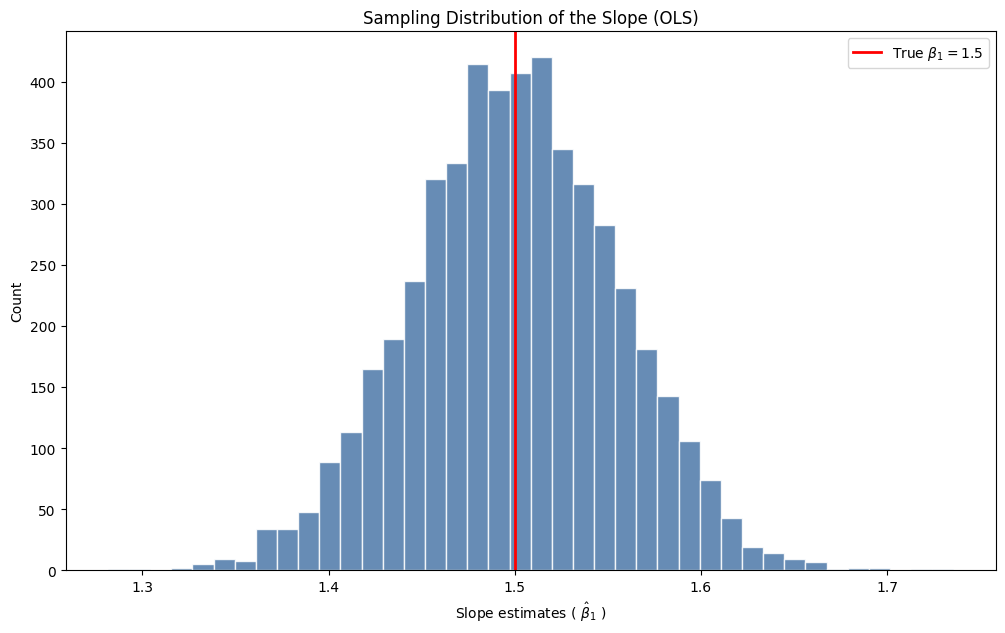

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# assumes `slopes` is a 1D numpy array of length 5000 with your slope estimates
beta_1 = 1.5
plt.figure(figsize=(12, 7))
plt.hist(slopes, bins=40, color="#4C78A8", edgecolor="white", alpha=0.85)
plt.axvline(x=beta_1, color="red", linewidth=2, label=r"True $\beta_1 = 1.5$")
plt.xlabel("Slope estimates ( $\hat{\\beta}_1$)")
plt.ylabel("Count")
plt.title("Sampling Distribution of the Slope (OLS)")
plt.legend()
plt.show()

The sampling distribution of the setimated slope $\hat{\beta}_1$ appears to be a normal distribution. The histogram is woughly symmetric, bell-shaped, and centered near the ture value of $\hat{\beta}_1$ = 1.5.

Use your sampling distribution to approximate the probability of observing a sample slope larger than 1.65. This can be done by looking at the proportion of simulated values larger than 1.65.

In [26]:
prop = (slopes > 1.65).mean()
print(f"The probability of observing a sample slope larger than 1.65 is {prop:.4f}")

The probability of observing a sample slope larger than 1.65 is 0.0038


The proportion of simulated values large than 1.65 is 0.0038.

Give an interpretation of this value and why it might be important for us in relation to a hypothesis test.

Under the null hypothesis that the ture value of slope is $\hat{\beta}_1$ = 1.5, the probability of observing a slope estimate large than 1.65, i.e. $P(\hat{\beta}_1>1.65$),  is 0.0038, which means if the true slope is 1.5, only 0.38% of slope estimates would be large than 1.65.
In real data if we observed a slope of 1.65, it would be highly unlikely under the null hypothesis.

# Part III - Big Data Examples & Rare Events

## Question 5
Pick an example in the article and briefly outline the issue around the data used to fit the model.
(3 pts)
• Describe how we might augment the data or otherwise account for the bias in that situation.

## Question 6
Choose one of the three major areas the paper discusses. Summarize the use of big data there. Are there any biases or other missing data that might affect results?

## Question 7
To have something to put here, can you think of another variable or scenario where understanding rare events is important?

# Part IV- Querying a database


## Question 8
Connect to the database (probably by uploading to Colab) and then look at all of the tables in the database (use read_sql() from pandas to have this returned as a data frame).

Using pandas we can check out the tables returned as a data frame

In [ ]:
import sqlite3
import pandas as pd
con = sqlite3.connect("lahman_1871-2022.sqlite")
# return the information of tables
pd.read_sql("SELECT * FROM sqlite_master WHERE type='table';", con)

,type,name,tbl_name,rootpage,sql
0,table,AllstarFull,AllstarFull,2,"CREATE TABLE AllstarFull (\nplayerID TEXT,\nye..."
1,table,Appearances,Appearances,3,"CREATE TABLE Appearances (\nyearID INTEGER,\nt..."
2,table,AwardsManagers,AwardsManagers,4,"CREATE TABLE AwardsManagers (\nplayerID TEXT,\..."
3,table,AwardsPlayers,AwardsPlayers,5,"CREATE TABLE AwardsPlayers (\nplayerID TEXT,\n..."
4,table,AwardsShareManagers,AwardsShareManagers,6,CREATE TABLE AwardsShareManagers (\nawardID TE...
5,table,AwardsSharePlayers,AwardsSharePlayers,7,CREATE TABLE AwardsSharePlayers (\nawardID TEX...
6,table,Batting,Batting,8,"CREATE TABLE Batting (\nplayerID TEXT,\nyearID..."
7,table,BattingPost,BattingPost,9,"CREATE TABLE BattingPost (\nyearID INTEGER,\nr..."
8,table,CollegePlaying,CollegePlaying,10,"CREATE TABLE CollegePlaying (\nplayerID TEXT,\..."
9,table,Fielding,Fielding,11,"CREATE TABLE Fielding (\nplayerID TEXT,\nyearI..."


In [ ]:
# check the first rows of collegePlaying  table used for partI question 2
pd.read_sql(f"SELECT * FROM 'CollegePlaying' LIMIT 5;", con)

,playerID,schoolID,yearID
0,aardsda01,pennst,2001
1,aardsda01,rice,2002
2,aardsda01,rice,2003
3,abadan01,gamiddl,1992
4,abadan01,gamiddl,1993


There are 27 tables in this database.

## Question 9
Write an SQL query using pd.read_sql() that returns all the teams that played in the year 2015 with all of the corresponding columns from the Teams table

In [ ]:
# SQL query to return all the teams palyed in 2015
query = """
    SELECT *
    FROM Teams
    WHERE yearID = 2015;
    """
pd.read_sql(query, con)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,2015,AL,BAL,BAL,E,3,162,78,81,81,...,134,0.987,Baltimore Orioles,Oriole Park at Camden Yards,2281202,103,104,BAL,BAL,BAL
1,2015,AL,BOS,BOS,E,5,162,81,78,84,...,148,0.984,Boston Red Sox,Fenway Park II,2880694,104,107,BOS,BOS,BOS
2,2015,AL,CHA,CHW,C,4,162,81,76,86,...,159,0.983,Chicago White Sox,U.S. Cellular Field,1755810,92,93,CHW,CHA,CHA
3,2015,AL,CLE,CLE,C,3,161,80,81,80,...,136,0.987,Cleveland Indians,Progressive Field,1388905,106,106,CLE,CLE,CLE
4,2015,AL,DET,DET,C,5,161,81,74,87,...,165,0.986,Detroit Tigers,Comerica Park,2726048,97,98,DET,DET,DET
5,2015,AL,HOU,HOU,W,2,162,81,86,76,...,131,0.986,Houston Astros,Minute Maid Park,2153585,97,99,HOU,HOU,HOU
6,2015,AL,KCA,KCR,C,1,162,81,95,67,...,138,0.985,Kansas City Royals,Kauffman Stadium,2708549,104,103,KCR,KCA,KCA
7,2015,AL,LAA,ANA,W,3,162,81,85,77,...,108,0.984,Los Angeles Angels of Anaheim,Angel Stadium of Anaheim,3012765,94,95,LAA,ANA,ANA
8,2015,AL,MIN,MIN,C,2,162,81,83,79,...,150,0.986,Minnesota Twins,Target Field,2220054,103,104,MIN,MIN,MIN
9,2015,AL,NYA,NYY,E,2,162,81,87,75,...,135,0.985,New York Yankees,Yankee Stadium III,3193795,99,101,NYY,NYA,NYA


There were 30 teams played in 2015.

## Question 10
Write an SQL query using `pd.read_sql()` that returns all of the players in the hall of fame, the year they were voted into the hall of fame, and their category - see the HallOfFame table, the inducted variable is important here.

We will use `LIMIT` to return the fisrt few rows of the HallOfFame table first.

In [ ]:
# check the first rows of table
pd.read_sql(f"SELECT * FROM 'HallOfFame' LIMIT 5;", con)

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,aaronha01,1982,BBWAA,415,312,406,Y,Player,None
1,abbotji01,2005,BBWAA,516,387,13,N,Player,None
2,abreubo01,2020,BBWAA,397,298,22,N,Player,None
3,abreubo01,2021,BBWAA,401,301,35,N,Player,None
4,abreubo01,2022,BBWAA,394,296,34,N,Player,None


then we will return all of the players in the HallOfFame with the year they were voted into the hall of fame, and their categorys where inducted = 'Y'

In [ ]:
# SQL query to return all of the players in the HallOfFame with some conditions
pd.read_sql( """
    SELECT playerID, yearid, category
    FROM HallOfFame
    WHERE inducted = 'Y';
""", con)

,playerID,yearid,category
0,aaronha01,1982,Player
1,alexape01,1938,Player
2,alomaro01,2011,Player
3,alstowa01,1983,Manager
4,andersp01,2000,Manager
...,...,...,...
335,yastrca01,1989,Player
336,yawketo99,1980,Pioneer/Executive
337,youngcy01,1937,Player
338,youngro01,1972,Player


## Question 11
Write an SQL query using pd.read_sql() that return all unique managers of the Pittsburgh Pi-rates (teamID of PIT) and only that information from the Managers table.
We will use [SELECT DISTINCT](https://www.sqlservertutorial.net/sql-server-basics/sql-server-select-distinct/) clause to reach the goal.


In [ ]:
# check the first rows of the Managers table
pd.read_sql(f"SELECT * FROM 'Managers' LIMIT 5;", con)

,playerID,yearID,teamID,lgID,inseason,G,W,L,rank,plyrMgr
0,wrighha01,1871,BS1,NA,1,31,20,10,3,Y
1,woodji01,1871,CH1,NA,1,28,19,9,2,Y
2,paborch01,1871,CL1,NA,1,29,10,19,8,Y
3,lennobi01,1871,FW1,NA,1,14,5,9,8,Y
4,deaneha01,1871,FW1,NA,2,5,2,3,8,Y


In [ ]:
# get unique managers of the PIT from the Managers table
query = """
    SELECT DISTINCT playerID
    FROM Managers
    WHERE teamID = 'PIT'
    ORDER by playerID;
"""
pd.read_sql(query, con)

,playerID
0,bezdehu99
1,bragabo01
2,buckeal99
3,burnsto01
4,burwebi01
5,bushdo01
6,callani01
7,clarkfr01
8,davissp01
9,donovpa01


The output shows that the `SELECT DISTINCT' returns only distint 41 managers without duplicates.

## Question 12
Use SQL code and the HallOfFame and Managers tables to return all of the playerIDs for the people that managed for a team that were inducted into the hall of fame. Also, programmatically report
the number of such people - this can be done in pandas after returning the data from the call to pd.read_sql()

We have already examined the HallOfFame and Managers tables in previous questions, so we will use *playerID* as the key to filter and join the results.

In [ ]:
# Return all playerIDs for people who managed a team and were inducted
query="""
    SELECT m.playerID
    FROM Managers AS m
    INNER JOIN HallOfFame AS h
        ON m.playerID = h.playerID
    WHERE h.inducted = 'Y';
    """
df = pd.read_sql(query, con)
df.head()

,playerID
0,alstowa01
1,alstowa01
2,alstowa01
3,alstowa01
4,alstowa01


then we will count the number of rows as the number of such people since we already returned distinct playerIDs

In [ ]:
num_people = df['playerID'].count()
print(f"The number of inducted people who managed a team is {num_people}")

The number of inducted people who managed a team is 996


## Question 13
Now use the same two tables (HallOfFame and Managers) and an SQL query to return every season
managed by each manager that made it to the hall of fame (so do this with an SQL join, not via
pd.merge()). You should return the playerID (manager ID), G, W, and L columns from the Managers
table.


In [ ]:
query = """
    SELECT m.playerID, m.G, m.W, m.L, m.inseason
    FROM Managers AS m
    INNER JOIN HallOfFame AS h
        ON m.playerID = h.playerID
    WHERE h.inducted = 'Y'
    ORDER BY m.playerID, m.yearID, m.inseason;
"""
df_season = pd.read_sql(query, con)
df_season

,playerID,G,W,L,inseason
0,alstowa01,154,92,62,1
1,alstowa01,154,98,55,1
2,alstowa01,154,93,61,1
3,alstowa01,154,84,70,1
4,alstowa01,154,71,83,1
...,...,...,...,...,...
991,wrighha01,46,22,23,5
992,wrighha01,138,68,69,1
993,wrighha01,155,87,66,1
994,wrighha01,133,72,57,1


Second, determine the overall win/loss records (sum of wins and sum of losses) for each of these hall
of fame managers.

In [ ]:
df_season.groupby('playerID')[['W', 'L']].sum()

,W,L
playerID,,
alstowa01,2040,1613
andersp01,2194,1834
ansonca01,1296,947
applilu01,10,30
baineha01,1,3
...,...,...
willidi02,1571,1451
willite01,273,364
wrighge01,59,25


Third, create a new variable that is the win/loss percentage (W/(W+L)). Lastly, sort the resulting data by the win/loss percentage variable (from largest to smallest). The last three parts can be done in pandas with the returned data or you can do it via SQL in your call to pd.read_sql().

In [ ]:
#create a new variable W/L_percent
df_season['W/L_percent'] = df_season['W'] / (df_season['W'] + df_season['L'])
df_season

,playerID,G,W,L,W/L_percent
0,alstowa01,154,92,62,0.597403
1,alstowa01,154,98,55,0.640523
2,alstowa01,154,93,61,0.603896
3,alstowa01,154,84,70,0.545455
4,alstowa01,154,71,83,0.461039
...,...,...,...,...,...
991,wrighha01,46,22,23,0.488889
992,wrighha01,138,68,69,0.496350
993,wrighha01,155,87,66,0.568627
994,wrighha01,133,72,57,0.558140


In [ ]:
sorted_df=df_season.sort_values(by='W/L_percent', ascending=False)
print(sorted_df)

      playerID   G   W   L  W/L_percent
806  simmote01   1   1   0     1.000000
369  hermabi01   2   2   0     1.000000
403  hornsro01   4   4   0     1.000000
975  wrighha01  82  71   8     0.898734
972  wrighha01  48  39   8     0.829787
..         ...  ..  ..  ..          ...
914  wagneho01   5   1   4     0.200000
917  wallabo01  25   5  20     0.200000
177  connoro01  46   8  37     0.177778
943  whitede01   2   0   2     0.000000
906  trammal01   1   0   1     0.000000

[996 rows x 5 columns]
